# STA130 HW04
____

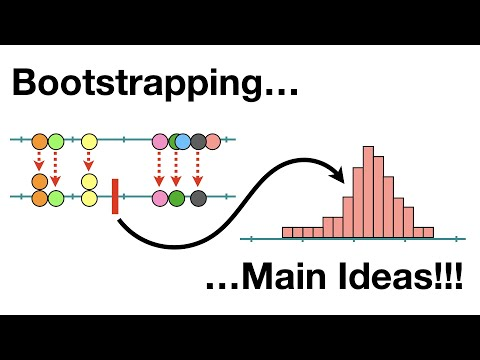

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

____


## 1)



The standard deviation indicates how spread out or varied the data points are around the mean. On the other hand, the standard error of the mean indicates how precise the sample mean is as an estimate of the population mean. 

Essentially, the difference between them is what they quantify. The standard deviation tells us the variability in a **single** sample, while the standard error of the mean describes the variability of **multiple** samples concerning how precise the sample mean is when compared to the population mean.

___
## 2)

Since the standard error of the mean describes how varied the sample mean is when compared to the population mean, we use the confidence interval to estimate the range on which the true population mean would fall.

Assuming the sample sizes are large enough to say that the distribution of the sample mean is approximately normal, we first have to find the critical values the 95% confidence interval would have. For a 95% confidence interval, 95% of the values in a normal distribution would lie within 1.96 standard deviations from the mean.

Next, we can calculate the 95% confidence interval with this formula:

> Confidence interval = x̄ ± 1.96 × Standard Error of the Mean

Where:
* x̄ is the sample mean
* 1.96 is the critical value from the standard normal distribution, corresponding to 95% confidence level
* Standard Error of the Mean which is self-explanatory

In a bootstrapping context, we can use the same formula but we have to indicate that the variables used are in the context of bootstrapping:

> Confidence interval<sub>boot</sub> = x̄<sub>boot</sub> ± 1.96 × Standard Error of the Mean<sub>boot</sub>

Where:
* x̄<sub>boot</sub> is the mean of the bootstrapped sample means.
* 1.96 is the critical value from the standard normal distribution, corresponding to 95% confidence level
* Standard Error of the Mean<sub>boot</sub> is the standard error of the mean of the bootstrapped sample means.

___
## 3)



Without using the standard deviation to estimate the standard error of the mean, we can use the percentile method.

First, we have to generate bootstrapped samples wherein we resample the orignal data with replacement multiple times and calculate the mean for each resample to get the distribution of bootstrapped sample means.

After that, we sort out the bootstrapped sample means in ascending order. 

Next, we determine the percentiles wherein with a 95% confidence interval, we exclude the lowest 2.5% and highest 2.5% of the bootstrapped sample means. This means that the lower bound of the confidence interval would be the 2.5% percentile of the sorted sample means, and the upper bound of the confidence interval would be the 97.5% percentile.

With all that, the 95% confidence interval will be in between the 2.5% percentile and the 97.5% percentile of the bootstrapped means.


___
## 4)



In [2]:
import numpy as np

# Sample data
sample = np.array([12, 15, 14, 10, 18, 16, 14, 13, 17, 11])

# Generating 1000 bootstrapped samples
n_bootstraps = 1000

# Empty list to store the bootstrapped means
bootstrap_means = []

# The process of bootstrapped resampling:
for _ in range(n_bootstraps):
    # Resample the original sample with replacements
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Calculate the mean and store it to 'bootstrap_means'
    bootstrap_means.append(np.mean(bootstrap_sample))

# Converting the list of bootstrapped means to a numpy array for easier calculations
bootstrap_means = np.array(bootstrap_means)

# Forming the 95% confidence interval by calculating the 2.5% and 97.5 percentiles
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Print the 95% confidence interval for the mean
print(f"95% Bootstrap Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")


95% Bootstrap Confidence Interval for the Mean: [12.5, 15.5]


The code can be easily used to calculate other population parameters (such as the median) by simply changing `np.mean` to `np.median`

In [3]:
import numpy as np

# Sample data
sample = np.array([12, 15, 14, 10, 18, 16, 14, 13, 17, 11])

# Generating 1000 bootstrapped samples
n_bootstraps = 1000

# Empty list to store the bootstrapped medians
bootstrap_medians = []

# The process of bootstrapped resampling:
for _ in range(n_bootstraps):
    # Resample the original sample with replacements
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Calculate the median and store it to 'bootstrap_medians'
    bootstrap_medians.append(np.median(bootstrap_sample))

# Converting the list of bootstrapped medians to a numpy array for easier calculations
bootstrap_means = np.array(bootstrap_medians)

# Forming the 95% confidence interval by calculating the 2.5% and 97.5 percentiles
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

# Print the 95% confidence interval for the median
print(f"95% Bootstrap Confidence Interval for the Median: [{lower_bound}, {upper_bound}]")


95% Bootstrap Confidence Interval for the Median: [12.0, 16.0]


___
## 5)

Population parameters refers to a fixed and unknown characteristic of an entire population. We cannot directly measure population parameters because that would mean we have to carefully and thoroughly examine an entire population. That's why we rely on the statistics of samples to help us estimate a particular population parameter of an entire population.

Confidence intervals are used to capture the uncertainty of working with samples due to sampling variability. With confidence intervals, we infer that the population parameter would fall on a certain range based on our samples. The interval basically indicates how confident we are on how the sample statistic estimates the population parameter.

So to summarize, population parameters are what we are trying to estimate when working with sample data and confidence intervals are used to indicate how confident we are with the estimation.


___
## 6)

**What is the process of bootstrapping?**

So, imagine you want to study an entire population, right. But to do that you have to spend a lot of money and unfortunately, you're broke. Plus, it's borderline impossible to study an entire population unless you have a dedicated team with you and you're getting good incentives to study that entire population. That's where we use bootstrapping. Bootstrapping is basically studying a small part of that population, which we call samples, to make estimations about that population.

Using the data from this sample, you create new samples by randomly selecting data points with replacement. This means that the same data point can be chosen more than once. We have to make sure, though, that each new sample is based on the original sample's data.

For example, let’s say you ask eight people about their happiness on a scale of 1 to 10. One person says they're a 1, three say they're an 8, two say they're a 7, and two say they're a 3. In bootstrapping, you might create a new sample where two people say they're a 1, one person says an 8, and so on, randomly selecting responses until you get the feel that the number of samples are enough. So you see, we get a new sample and with more varied data!

We have to repeat this process a lot of times to get an accurate estimation of the characteristic of a population we want to study, but don't worry we have computers to do all that. After getting a lot of samples which you think are enough to estimate a characteristic of a population, we get, usually, the average of the data of each sample and create a distribution. A distribution is basically laying out what averages are observed and how often they occur. And, that's everything, I think. 

**What is the main purpose of bootstrapping?**

As I said before my friend, bootstrapping offers a more convenient way of estimating an entire population. In bootstrapping, we get new samples with more varied data which help us in being more accurate with our estimation of a characteristic of a population we want to study. 

So instead of surveying, let's say, an entire city about each person's happiness level, we can just gather a small group, use bootstrapping to create many new samples, and get a solid idea of the overall happiness without spending a fortune or taking forever!

Plus, this method is widely used and and known for its efficiency and reliability. So, you can basically say that we can definitely trust this method and say that it's a smarter way of getting meaningful insights from your data.

**If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?**

Okay, you're asking a very technical question for someone who has little experience with statistics. But to answer your question, we have these things called confidence intervals. So, remember the distribution you made? Well, we have to gauge how confident we are on how the distribution correctly estimates the characteristic of that population we're trying to study. Usually, people are 90%, 95%, and 99% confident but never a 100% sure. So, for example, when we say we're 95% confident that the characteristic of a population is present in the distribution of samples, we create a range or interval on where the characteristic is going to lie on. We have to determine which values of the distribution are the upper and lower boundaries for where the characteristic of the population is going to be. 

So say, with the happiness study, we make an educated guess that the average happiness level would be a 6. After calculating the average happiness levels from each bootstrapped sample and say we're 95% confident with our sample distribution, we find that the confidence interval is, let's say, in between a 4 and 7, which are respectively the lower and upper boundary based on the confidence interval. So, we can definitely conclude that our guess that the average happiness level being 6 is plausible because it is in between those boundaries.

___

## 7)

When we say that a confidence interval overlapping zero "fails to reject the null hypothesis", it means that we simply don't have enough evidence to confidently say that the drug has an effect. Because the confidence iinterval overlaps zero, there is a chance that that the true population might be zero, but we can't say for sure. We might need more sample sizes to correctly estimate the effect of the drug.

In order to reject a null hypothesis, the confidence interval should not overlap zero in order to conclude that the drug (on average) has an effect. Additionally, if the p-value (or the probability value) is less than the predetermined significance level, it indicates that the observed effect is statistically significant, providing further support to reject the null hypothesis.

___

## 8)



# Vaccine Data Analysis

### Problem Introduction

Health has always been a matter of great importance to every single person. It determines the state of a human being and greatly affects how a person achieves what they aim to do. There are numerous benefits in maintaining good health, fatal consequences for a detoriating health. As part of the recent developments in the field of medicine, AliTech has created a new vaccine that aims to improve the health of the people who take it. This analysis aims to examine the effectiveness of that vaccine by evaluating the health scores of selected patients before and after the implementation of the vaccine.

#### Statement of the Hypothesis

In this context, the null hypothesis states that there is no significant difference between the initial and final health scores of the patients. Any observed change is assumed to have been random variation than an actual effect. On the other hand, the alternative hypothesis aims to oppose this claim by concluding that there is a significant difference between the initial and final health scores of the patients. This analysis aims to prove the latter, and disprove the former.

#### Data Visualization 


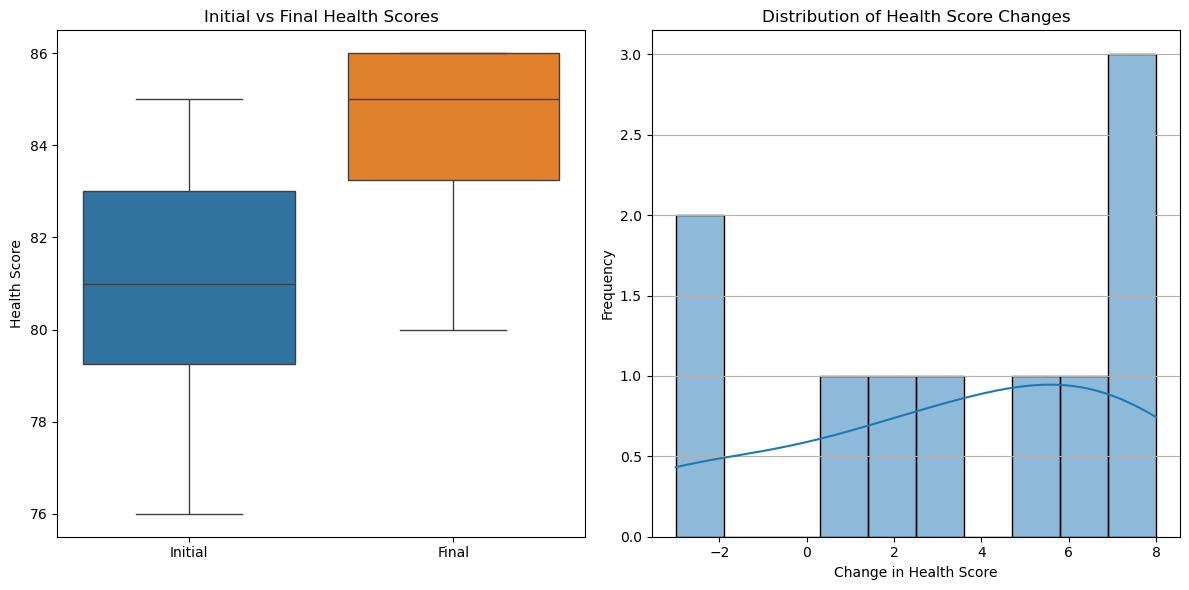

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/seomach/STA130_HW_F24/refs/heads/main/patient_health_scores.csv')

# Data Visualization
plt.figure(figsize=(12, 6))

# Boxplot for Initial vs Final Health Scores
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']])
plt.title('Initial vs Final Health Scores')
plt.ylabel('Health Score')
plt.xticks(ticks=[0, 1], labels=['Initial', 'Final'])

# Histogram for Distribution of Health Score Changes
plt.subplot(1, 2, 2)
sns.histplot(df['FinalHealthScore'] - df['InitialHealthScore'], bins=10, kde=True)
plt.title('Distribution of Health Score Changes')
plt.xlabel('Change in Health Score')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Add grid for better readability

# Layout adjustment and display
plt.tight_layout()
plt.show()

In the graphs above, it is initially observed that there has been an effect (specifically an increase) in health scores among the patients. The histogram, in particular, shows the distribution of the score changes between the patients.

### Quantitative Analysis

#### Methodology 

In order to effectively analyze the data, bootstrapping is performed to understand the differences between the initial and final health scores. Bootstrapping is the statistical method wherein the data is resampled to estimate the distribution of a statistic. The code below generates bootstrapped samples for both the initial and final health scores, the calculation of the mean of the two health scores, and a visualization of the health scores.

The aim of the analysis is to determine the effectiveness of the vaccine. The mean difference between the two health scores are also calculated and visualized below.



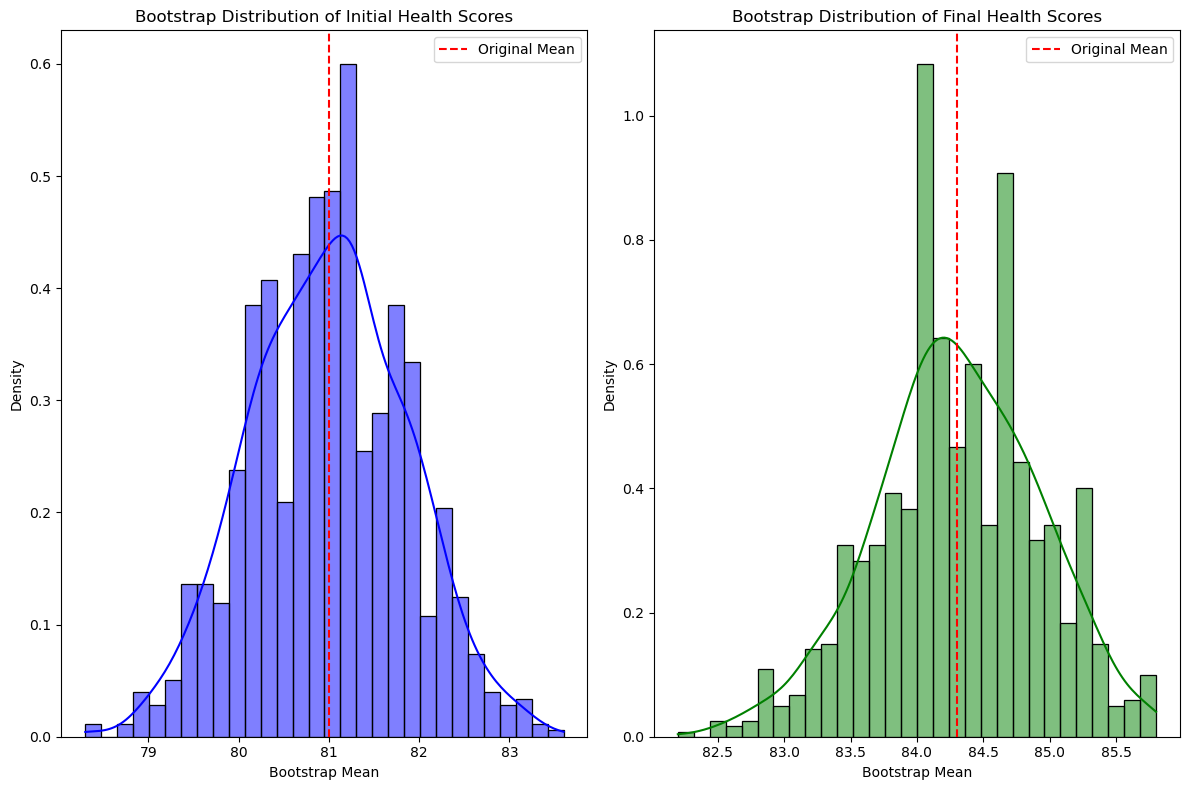

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform bootstrapping
def bootstrap(data_dict, num_samples, statistic):
    """Generates bootstrap samples and calculates a statistic for each sample."""
    bootstrapped_stats = {key: [] for key in data_dict.keys()}  # Initialize dictionary for each data set
    n = len(next(iter(data_dict.values())))  # Get length from the first dataset

    for _ in range(num_samples):
        # Create bootstrap samples for each dataset
        for key in data_dict.keys():
            sample = np.random.choice(data_dict[key], size=n, replace=True)  # Resample with replacement
            bootstrapped_stats[key].append(statistic(sample))  # Calculate the statistic

    return bootstrapped_stats

# Number of bootstrap samples
num_samples = 1000

# Prepare data for bootstrapping
data_for_bootstrap = {
    'InitialHealthScore': df['InitialHealthScore'].values,
    'FinalHealthScore': df['FinalHealthScore'].values
}

# Perform bootstrapping for initial and final health scores
bootstrapped_means = bootstrap(data_for_bootstrap, num_samples, np.mean)

# Calculate the differences and bootstrap for differences
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']
score_differences = df['ScoreDifference'].values

# Perform bootstrapping for score differences
bootstrapped_means['ScoreDifference'] = bootstrap({'ScoreDifference': score_differences}, num_samples, np.mean)['ScoreDifference']

# Plotting the bootstrap distributions
plt.figure(figsize=(12, 8))

# Initial Health Scores
plt.subplot(1, 2, 1)
sns.histplot(bootstrapped_means['InitialHealthScore'], bins=30, kde=True, color='blue', stat='density')
plt.axvline(np.mean(data_for_bootstrap['InitialHealthScore']), color='red', linestyle='--', label='Original Mean')
plt.title('Bootstrap Distribution of Initial Health Scores')
plt.xlabel('Bootstrap Mean')
plt.ylabel('Density')
plt.legend()

# Final Health Scores
plt.subplot(1, 2, 2)
sns.histplot(bootstrapped_means['FinalHealthScore'], bins=30, kde=True, color='green', stat='density')
plt.axvline(np.mean(data_for_bootstrap['FinalHealthScore']), color='red', linestyle='--', label='Original Mean')
plt.title('Bootstrap Distribution of Final Health Scores')
plt.xlabel('Bootstrap Mean')
plt.ylabel('Density')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

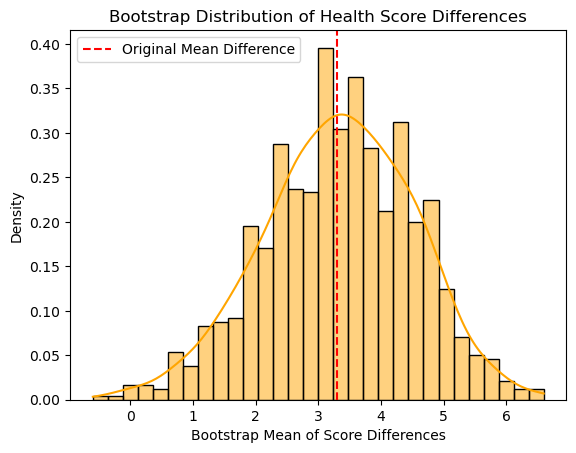

Original Mean Difference: 3.3


In [6]:
# Bootstrap Distribution of Differences
sns.histplot(bootstrapped_means['ScoreDifference'], bins=30, kde=True, color='orange', stat='density')
plt.axvline(np.mean(score_differences), color='red', linestyle='--', label='Original Mean Difference')
plt.title('Bootstrap Distribution of Health Score Differences')
plt.xlabel('Bootstrap Mean of Score Differences')
plt.ylabel('Density')
plt.legend()

# Adjust layout and display
plt.show()

# Print the original mean difference
print(f"Original Mean Difference: {np.mean(score_differences)}")

It is observed that there is a positive mean difference indicating that the patients' health improved from the initial to the final measurement. In the next visualization, a 95% confidence interval is applied to the distribution of mean differences. The confidence interval assesses the estimation of the population mean difference from the bootstrapped samples.


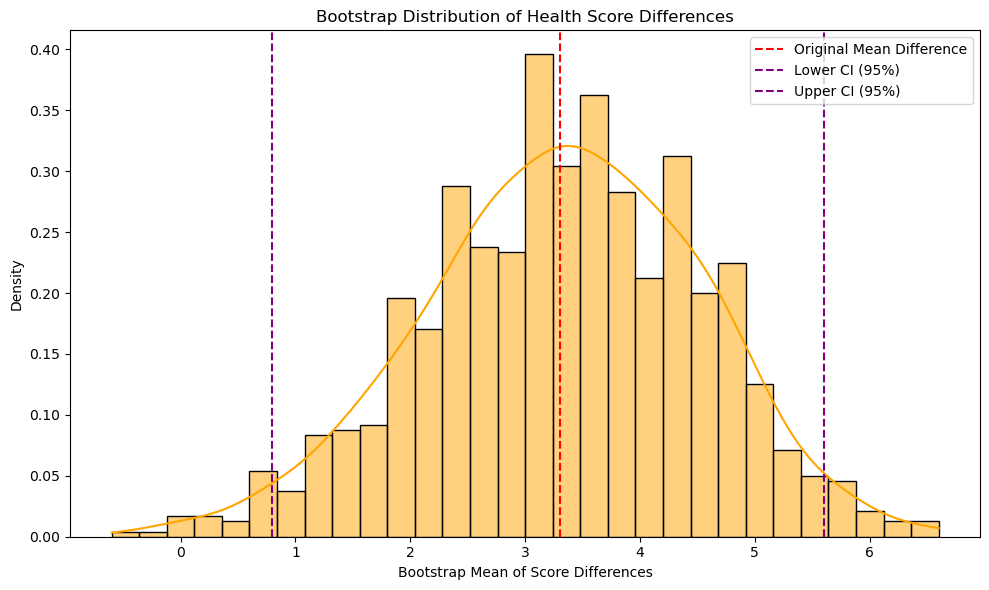

Original Mean Difference: 3.3
95% Confidence Interval for Mean Difference: [0.80, 5.60]


In [7]:
# Calculate confidence intervals for the mean difference
alpha = 0.05  # For a 95% confidence interval
lower_bound = np.percentile(bootstrapped_means['ScoreDifference'], 100 * (alpha / 2))
upper_bound = np.percentile(bootstrapped_means['ScoreDifference'], 100 * (1 - alpha / 2))

# Plotting the bootstrap distribution of differences with confidence interval
plt.figure(figsize=(10, 6))
sns.histplot(bootstrapped_means['ScoreDifference'], bins=30, kde=True, color='orange', stat='density')
plt.axvline(np.mean(score_differences), color='red', linestyle='--', label='Original Mean Difference')
plt.axvline(lower_bound, color='purple', linestyle='--', label='Lower CI (95%)')
plt.axvline(upper_bound, color='purple', linestyle='--', label='Upper CI (95%)')
plt.title('Bootstrap Distribution of Health Score Differences')
plt.xlabel('Bootstrap Mean of Score Differences')
plt.ylabel('Density')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print the original mean difference and confidence interval
print(f"Original Mean Difference: {np.mean(score_differences)}")
print(f"95% Confidence Interval for Mean Difference: [{lower_bound:.2f}, {upper_bound:.2f}]")

### Findings and Discussion



It can be observed that the confidence interval for the mean difference does not overlap with zero. Therefore, the null hypothesis can be definitively rejected. This analysis found evidence to suggest a significant difference between initial and final health scores. This indicates that vaccine may have an effect on the patients' health scores, specifically a positive one.

#### Further Considerations

Future studies could explore a larger and more diverse patient population to provide a broader understanding of the health outcomes associated with the implementation of the vaccine.



___
## 9)

somewhat.

___
## ChatGPT Chat Log Summaries:

### SEM vs SD Explained

https://chatgpt.com/share/66fcaa76-b61c-8011-86f0-e95b4fdc40b9

### Population Parameter vs Sample Statistic

https://chatgpt.com/share/66fcaa92-e33c-8011-b8a7-783ed802acea

### Confidence Intervals and Hypothesis Testing

https://chatgpt.com/share/66fcaaab-a358-8011-b72b-aaf70fda4766

### Patient Health Score CSV

https://chatgpt.com/share/66fcaa55-8dac-8011-8fa8-796600893401